In [55]:
!pip install tensorflow

INFO: pip is looking at multiple versions of tensorflow to determine which version is compatible with other requirements. This could take a while.
  Using cached tensorflow-2.13.0rc1-cp311-cp311-macosx_12_0_arm64.whl (2.0 kB)
  Using cached tensorflow_macos-2.13.0rc1-cp311-cp311-macosx_12_0_arm64.whl (189.3 MB)
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached flatbuffers-23.5.26-py2.py3-none-any.whl (26 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 1.0 MB/s eta 0:00:0000:010:00:01
  Using cached libclang-16.0.0-py2.py3-none-macosx_11_0_arm64.whl (24.3 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached protobuf-4.23.3-cp37-abi3-macosx_10_9_universal2.whl (400 kB)
  Using cached termcolor-2.3.0-py3-none-any.whl (6.9 kB)
  Using cached wrapt-1.15.0-cp311-cp311

In [83]:
!pip install tensorflow_hub 

  Using cached tensorflow_hub-0.13.0-py2.py3-none-any.whl (100 kB)


In [84]:
import tensorflow as tf
import numpy as np
import pandas as pd
import os
import tensorflow_hub as hub
import matplotlib.pyplot as plt

In [7]:
dataset_folder = 'Dataset'

In [24]:
# Assuming each subfolder in the 'dataset' folder is a different class
classes = [d for d in os.listdir(dataset_folder) if os.path.isdir(os.path.join(dataset_folder, d))]
images = []
labels = []

for class_name in classes:
    class_folder = os.path.join(dataset_folder, class_name)
    
    for image_path in os.listdir(class_folder):
        images.append(os.path.join(class_folder, image_path))
        labels.append(class_name)


In [25]:
len(images)

11653

In [26]:
len(labels)

11653

In [27]:
unique_labels = set(labels)
print(unique_labels)


{'Gingivitis', 'Mouth_Ulcer', 'Calculus', 'Tooth_discoloration', 'Caries', 'hypodontia'}


<Axes: >

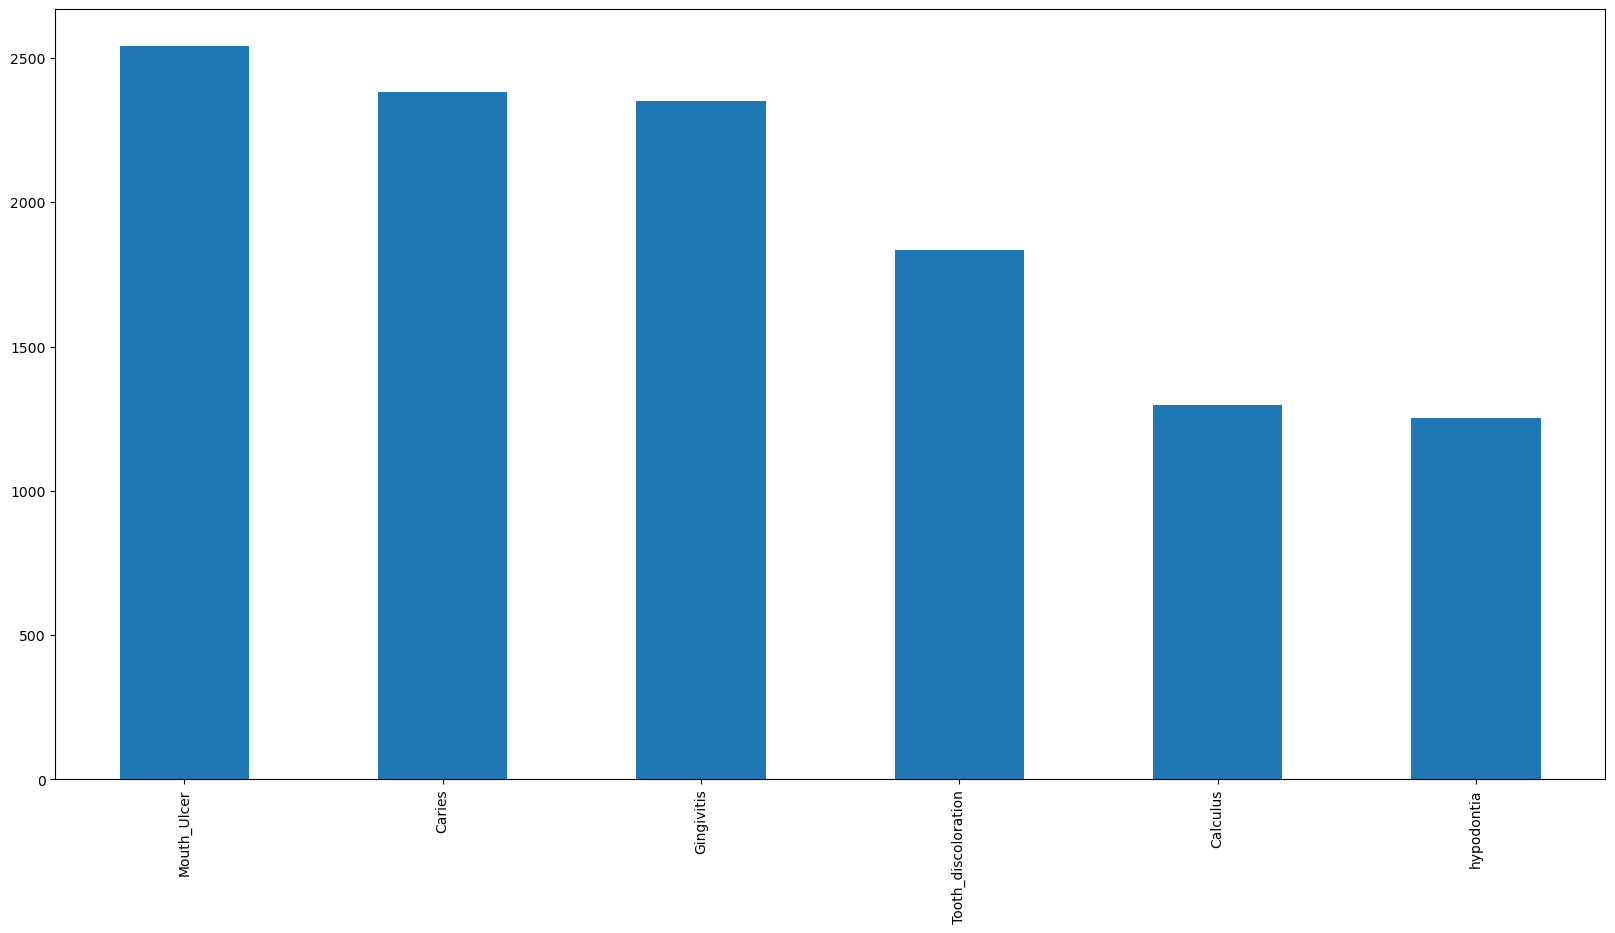

In [31]:
label_series =pd.Series(labels)
label_series.value_counts().plot.bar(figsize=(20,10))

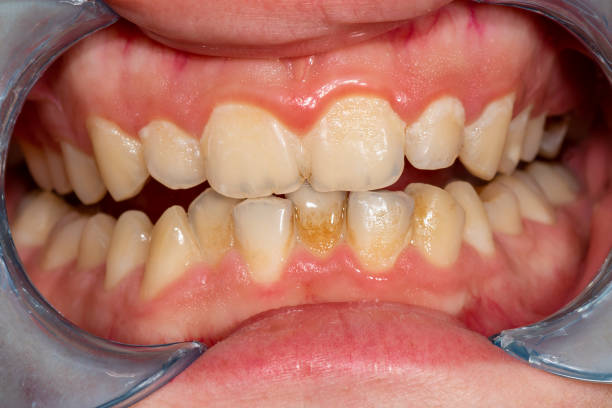

In [32]:
from IPython.display import Image
Image('Dataset/Calculus/(10).jpg')

In [40]:
labels = label_series.to_numpy()

In [45]:
labels[0]

'hypodontia'

In [46]:
images[0]

'Dataset/hypodontia/(819).jpg'

In [42]:
if len(labels) == len(images):
    print('same amount')
else: 
    print('NO')

same amount


In [43]:
unique_names = np.unique(labels)
len(unique_names), unique_labels

(6,
 {'Calculus',
  'Caries',
  'Gingivitis',
  'Mouth_Ulcer',
  'Tooth_discoloration',
  'hypodontia'})

In [47]:
boolean_names = [label==unique_names for label in labels] 

In [1]:
#boolean_names

In [49]:
images[:10]

['Dataset/hypodontia/(819).jpg',
 'Dataset/hypodontia/(1007).JPG',
 'Dataset/hypodontia/(24).JPG',
 'Dataset/hypodontia/(1142).JPG',
 'Dataset/hypodontia/(726).JPG',
 'Dataset/hypodontia/(376).jpg',
 'Dataset/hypodontia/(399).jpg',
 'Dataset/hypodontia/(663).jpg',
 'Dataset/hypodontia/(233).JPG',
 'Dataset/hypodontia/(73).JPG']

## Creating a Validation Set

In [50]:
x = images
y= boolean_names

## Experimenting with 1000 images

In [52]:
from sklearn.model_selection import train_test_split
NUM_IMAGES = 1000 

In [95]:
x_train, x_temp , y_train ,y_temp= train_test_split(x,y,test_size=0.3,random_state=42)

x_val, x_test, y_val, y_test = train_test_split(x_temp,y_temp,test_size=0.5,random_state=42)

len(x_train), len(y_train), len(x_val), len(y_val), len(x_test), len(y_test)

(8157, 8157, 1748, 1748, 1748, 1748)

## Preprocessing images

In [96]:
from matplotlib.pyplot import imread
image = imread(images[2])
image

array([[[241, 202, 185],
        [242, 203, 188],
        [242, 204, 191],
        ...,
        [229, 180, 165],
        [229, 180, 165],
        [226, 179, 163]],

       [[244, 205, 190],
        [244, 205, 190],
        [244, 206, 193],
        ...,
        [228, 179, 164],
        [228, 179, 164],
        [229, 182, 166]],

       [[237, 198, 183],
        [238, 199, 184],
        [239, 199, 187],
        ...,
        [228, 179, 164],
        [227, 178, 163],
        [231, 184, 168]],

       ...,

       [[250, 207, 198],
        [252, 209, 200],
        [252, 209, 200],
        ...,
        [197, 140, 120],
        [196, 139, 119],
        [196, 139, 119]],

       [[247, 207, 197],
        [250, 210, 200],
        [251, 211, 201],
        ...,
        [195, 138, 118],
        [194, 137, 117],
        [194, 137, 117]],

       [[247, 207, 197],
        [250, 210, 200],
        [250, 212, 201],
        ...,
        [194, 137, 117],
        [193, 136, 116],
        [189, 132, 112]]

In [97]:
tf.constant(image[:2])

<tf.Tensor: shape=(2, 185, 3), dtype=uint8, numpy=
array([[[241, 202, 185],
        [242, 203, 188],
        [242, 204, 191],
        ...,
        [229, 180, 165],
        [229, 180, 165],
        [226, 179, 163]],

       [[244, 205, 190],
        [244, 205, 190],
        [244, 206, 193],
        ...,
        [228, 179, 164],
        [228, 179, 164],
        [229, 182, 166]]], dtype=uint8)>

In [98]:
IMG_SIZE = 224
def process_image(image_path):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image,channels=3)
    image = tf.image.convert_image_dtype(image,tf.float32)
    image = tf.image.resize(image , size = [IMG_SIZE,IMG_SIZE])
    
    return image

## Turning data into batches 

In [99]:
def get_image_label(image_path,label):
    image = process_image(image_path)
    return image, label

In [100]:
get_image_label(x[42],y[42])

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.9804798 , 0.90597   , 0.84714645],
         [0.9843138 , 0.909804  , 0.85098046],
         [0.9843138 , 0.909804  , 0.85098046],
         ...,
         [0.68408597, 0.46839967, 0.3507526 ],
         [0.6350494 , 0.41936314, 0.30171606],
         [0.6313726 , 0.4156863 , 0.29803923]],
 
        [[0.9804798 , 0.90597   , 0.84714645],
         [0.9843138 , 0.909804  , 0.85098046],
         [0.9843138 , 0.909804  , 0.85098046],
         ...,
         [0.65678567, 0.44109938, 0.3234523 ],
         [0.61754715, 0.4018609 , 0.2842138 ],
         [0.61461836, 0.3989321 , 0.28128502]],
 
        [[0.9804798 , 0.90597   , 0.84714645],
         [0.9843138 , 0.909804  , 0.85098046],
         [0.9843138 , 0.909804  , 0.85098046],
         ...,
         [0.6344189 , 0.42281178, 0.3031251 ],
         [0.60774696, 0.3961398 , 0.27645317],
         [0.6058036 , 0.39419645, 0.27450982]],
 
        ...,
 
        [[0.9687151 , 0.89812684

In [187]:
BATCH_SIZE = 32
def create_data_batches(x,y=None,batch_size=BATCH_SIZE,valid_data=False,test_data=False):
    if test_data:
        print('Creating Test Data')
        data = tf.data.Dataset.from_tensor_slices((tf.constant(x)))
        data_batch = data.map(process_image).batch(BATCH_SIZE)
        return data_batch
    
    elif valid_data:
        print('Creating Validation Data')
        data = tf.data.Dataset.from_tensor_slices((tf.constant(x),tf.constant(y)))
        data_batch = data.map(get_image_label).batch(BATCH_SIZE)
        return data_batch
    
    else:
        print('Creating Training Data')
        data = tf.data.Dataset.from_tensor_slices((tf.constant(x),tf.constant(y)))
        data = data.shuffle(buffer_size=len(x))
        data_batch = data.map(get_image_label).batch(BATCH_SIZE)
        return data_batch

In [188]:
train_data = create_data_batches(x_train,y_train)
val_data = create_data_batches(x_val,y_val,valid_data=True)
test_data = create_data_batches(x_test, y_test,test_data=True)

Creating Training Data
Creating Validation Data
Creating Test Data


In [189]:
train_data.element_spec, val_data.element_spec, test_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 6), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 6), dtype=tf.bool, name=None)),
 TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None))

In [104]:
def show_images(images,labels):
    plt.figure(figsize=(10,10))
    for i in range(25):
        ax = plt.subplot(5,5,i+1)
        plt.imshow(images[i])
        plt.title(unique_names[labels[i].argmax()])
        plt.axis('off')

In [105]:
train_images , train_labels = next(train_data.as_numpy_iterator())

In [148]:
val_images, val_labels = next(val_data.as_numpy_iterator())



In [169]:
# test_images, test_labels = next(test_data.as_numpy_iterator())

## Building a model

In [107]:
INPUT_SHAPE = [None, IMG_SIZE,IMG_SIZE,3]
OUTPUT_SHAPE = len(unique_names)
MODEL_URL = 'https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b0/feature_vector/2'

In [108]:
def create_model(input_shape = INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
    print('Building model')
    model = tf.keras.Sequential([
        hub.KerasLayer(model_url),
        tf.keras.layers.Dense(units=output_shape,
                               activation = 'softmax'
                              )
    ])
    model.compile(
        loss = tf.keras.losses.CategoricalCrossentropy(),
        optimizer = tf.keras.optimizers.Adam(),
        metrics = ['accuracy']
    )
    model.build(input_shape)
    return model

In [109]:
model = create_model()
model.summary()

Building model


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_3 (KerasLayer)  (None, 1280)              5919312   
                                                                 
 dense_2 (Dense)             (None, 6)                 7686      
                                                                 
Total params: 5926998 (22.61 MB)
Trainable params: 7686 (30.02 KB)
Non-trainable params: 5919312 (22.58 MB)
_________________________________________________________________


## Creating Callbacks

In [89]:
%load_ext tensorboard

In [90]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=3)

In [91]:
NUM_EPOCHS = 100

In [110]:
def train_model():
    model = create_model()
    model.fit(x = train_data,
             epochs= NUM_EPOCHS,
             validation_data=val_data,
             validation_freq=1,
             callbacks=[early_stopping])
    return model

In [111]:
model = train_model()

Building model


Epoch 1/100
255/255 [==============================] - 103s 396ms/step - loss: 0.8702 - accuracy: 0.6903 - val_loss: 0.6465 - val_accuracy: 0.7592
Epoch 2/100
255/255 [==============================] - 110s 431ms/step - loss: 0.5544 - accuracy: 0.8063 - val_loss: 0.5399 - val_accuracy: 0.7958
Epoch 3/100
255/255 [==============================] - 115s 451ms/step - loss: 0.4644 - accuracy: 0.8361 - val_loss: 0.4813 - val_accuracy: 0.8209
Epoch 4/100
255/255 [==============================] - 115s 452ms/step - loss: 0.4081 - accuracy: 0.8557 - val_loss: 0.4456 - val_accuracy: 0.8330
Epoch 5/100
255/255 [==============================] - 121s 476ms/step - loss: 0.3704 - accuracy: 0.8714 - val_loss: 0.4130 - val_accuracy: 0.8484
Epoch 6/100
255/255 [==============================] - 128s 504ms/step - loss: 0.3402 - accuracy: 0.8813 - val_loss: 0.4029 - val_accuracy: 0.8473
Epoch 7/100
255/255 [==============================] - 131s 513ms/step - loss: 0.3165 - accuracy: 0.8877 - val_loss: 0

In [112]:
predictions = model.predict(val_data,verbose=1)
predictions

55/55 [==============================] - 31s 544ms/step


array([[3.7215512e-02, 5.0083973e-02, 8.3471519e-01, 3.3566549e-03,
        2.1062247e-04, 7.4418001e-02],
       [1.1233164e-05, 9.9592435e-01, 8.6678911e-06, 1.0361762e-06,
        4.0543131e-03, 3.7733773e-07],
       [4.1519570e-08, 1.6970856e-02, 1.8367909e-07, 9.7411108e-01,
        8.9137815e-03, 4.0546447e-06],
       ...,
       [9.7201872e-01, 1.3321572e-03, 2.2384467e-02, 5.5354458e-06,
        3.4373810e-03, 8.2161842e-04],
       [8.4810682e-02, 9.8884009e-02, 5.5457217e-01, 1.9766402e-04,
        2.6067019e-01, 8.6532941e-04],
       [5.6306314e-02, 3.3128468e-04, 9.3568480e-01, 2.4472192e-05,
        1.6898499e-03, 5.9632636e-03]], dtype=float32)

In [113]:
predictions.shape

(1748, 6)

In [118]:
index = 4
print(f"Max value: {np.max(predictions[index])}")

Max value: 0.9939391613006592


In [120]:
def get_pred_label(prediction_probablities):
    return unique_names[np.argmax(prediction_probablities)]
pred_label = get_pred_label(predictions[82])
pred_label

'Caries'

In [123]:
def unbatchify(data):
    images = []
    labels = []
    for image , label in data.unbatch().as_numpy_iterator():
        images.append(image)
        labels.append(unique_names[np.argmax(label)])
    return images , labels
val_images, val_labels = unbatchify(val_data)

In [138]:
def plt_pred(prediction_probablities, labels,images , n=1):
    pred_prob, true_label, image = prediction_probablities[n], labels[n], images[n]
    pred_label = get_pred_label(pred_prob)
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
    if pred_label == true_label:
        color='green'
    else:
        color='red'
    plt.title('{}{:2}% {}'.format(pred_label,
                                     np.max(pred_prob),
                                     true_label),
                                      color=color)

In [140]:
def plot_pred_conf(prediction_probablities,labels,n=1):
    pred_prob ,true_label = prediction_probablities[n], labels[n]
    pred_label=get_pred_label(pred_prob)
    top_10 = pred_prob.argsort()[-10:][::-1]
    top_10_values = pred_prob[top_10]
    top_10_labels = unique_names[top_10]
    
    top_plot=plt.bar(np.arange(len(top_10_labels)),
                    top_10_values,
                    color='grey')
    plt.xticks(np.arange(len(top_10_labels)),
              labels = top_10_labels,
              rotation = 'vertical')
    if np.isin(true_label,top_10_labels):
        top_plot[np.argmax(top_10_labels == true_label)].set_color('green')
    else:
        pass

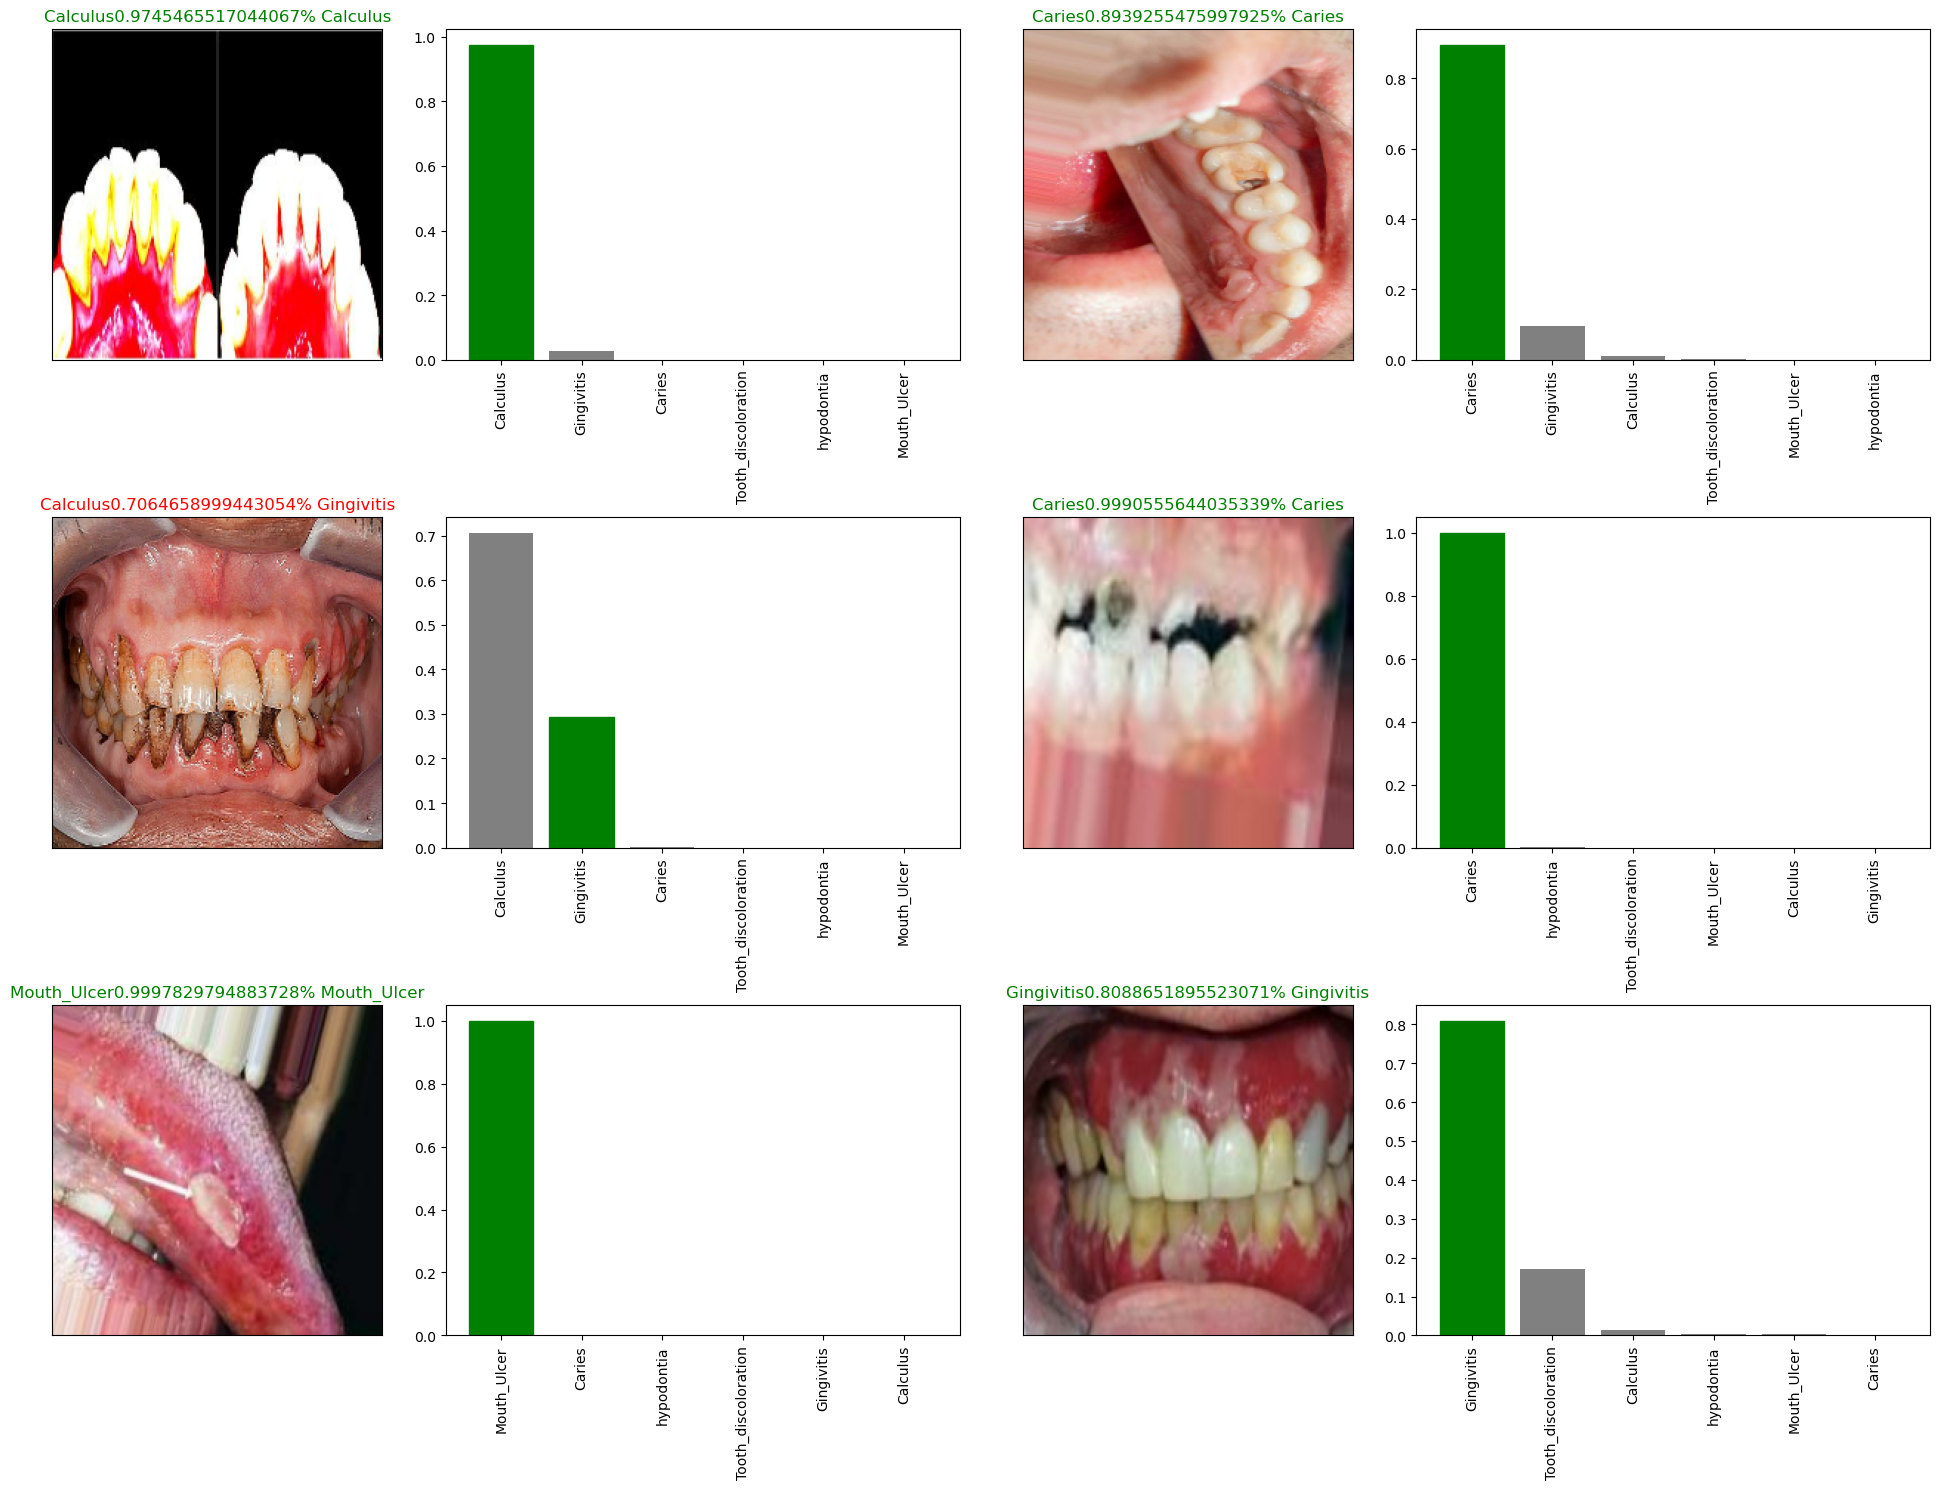

In [ ]:
i_multiplier =20
num_rows = 3
num_cols =2
num_images = num_rows*num_cols
plt.figure(figsize=(10*num_cols,5*num_rows))

for i in range(num_images):
    plt.subplot(num_rows,2*num_cols,2*i+1)
    plt_pred(prediction_probablities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
    plt.subplot(num_rows,2*num_cols,2*i+2)
    plot_pred_conf(prediction_probablities=predictions,
                  labels=val_labels,
                  n=i+i_multiplier)
    plt.tight_layout(h_pad=1.0)
plt.show()

In [142]:
test_data

<_BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [143]:
test_predictions = model.predict(test_data,
                                verbose=1)

55/55 [==============================] - 32s 573ms/step


In [166]:
test_predictions

array([[1.0584492e-06, 1.0439686e-01, 1.6673166e-06, 7.1398437e-02,
        8.2332110e-01, 8.8085717e-04],
       [1.2983201e-01, 1.7395807e-02, 4.3578887e-01, 1.5860693e-05,
        1.1853738e-05, 4.1695556e-01],
       [2.7857590e-04, 4.0888506e-01, 3.9491869e-04, 5.7098770e-01,
        1.9168381e-02, 2.8528305e-04],
       ...,
       [4.9633133e-08, 8.4612314e-03, 1.9559939e-06, 9.9123442e-01,
        2.9017535e-04, 1.2046799e-05],
       [2.0601776e-04, 9.9425226e-01, 4.7614041e-04, 6.5850787e-04,
        1.4625415e-03, 2.9444844e-03],
       [2.2622686e-08, 5.1981740e-05, 1.5630881e-07, 9.9994493e-01,
        1.2814236e-06, 1.7118600e-06]], dtype=float32)

In [170]:
def unbatchify(data):
    images = []
    labels = []
    for image , label in data.unbatch().as_numpy_iterator():
        images.append(image)
        labels.append(unique_names[np.argmax(label)])
    return images , labels
test_images, test_labels = unbatchify(test_data)

In [173]:


# Convert predicted probabilities to class labels
test_predictions_labels = np.argmax(test_predictions, axis=1)


In [179]:
test_predictions_text = [unique_names[i] for i in test_predictions_labels]


In [180]:
from sklearn.metrics import accuracy_score, mean_squared_error

# Calculate the accuracy for classification task
accuracy = accuracy_score(test_labels,test_predictions_text)
print('Accuracy:', accuracy)



Accuracy: 0.897025171624714


## Custom Data

In [230]:
custom_path = 'Tooth-Images-New/'
custom_image_path = [custom_path +fname for fname in os.listdir(custom_path)]

In [231]:
custom_image_path

['Tooth-Images-New/istockphoto-954260386-1024x1024.jpg']

In [232]:
custom_data = create_data_batches(custom_image_path,test_data=True)
custom_data

Creating Test Data


<_BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [233]:
custom_preds = model.predict(custom_data)

1/1 [==============================] - 0s 68ms/step


In [234]:
custom_preds_labels = [get_pred_label(custom_preds)]

In [235]:
custom_preds_labels

['Mouth_Ulcer']

In [236]:
custom_images = []
for image in custom_data.unbatch().as_numpy_iterator():
    custom_images.append(image)

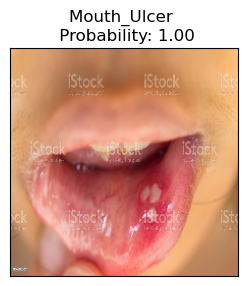

In [237]:
plt.figure(figsize=(10,10))
custom_preds_probs = [np.max(pred) for pred in custom_preds]
for i , image in enumerate(custom_images):
    plt.subplot(1,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.title(f"{custom_preds_labels[i]} \n Probability: {custom_preds_probs[i]:.2f}")
    plt.imshow(image)

In [201]:
import os
import datetime
def save_model(model,suffix=None):
    modeldir = os.path.join('Model',
                           datetime.datetime.now().strftime('%Y%m%d-%H%M%s'))
    model_path = modeldir + '-' + suffix + '.h5'
    print('Saving model')
    model.save(model_path)
    return model_path

In [202]:
save_model(model, suffix='Dentist-Model')

Saving model


/Users/vipulbhatia/my_code/ML/Dental_Image_Classification/env/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


'Model/20230623-19351687529121-Dentist-Model.h5'